In [1]:

import logging
import math, sys
import seaborn as sns
from platform import python_version
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

from src.main.GSHM import gshm_delta

sns.set_theme(font_scale=1.5, rc={'text.usetex' : True})
from src.main.util.logging_utils import init_logger

logger = init_logger(logging.INFO)
if python_version() <= "3.10":
    logger.warning("This script has only been tested on python 3.9. Detected: {}".format(python_version()))

import numpy as np
import matplotlib.pyplot as plt

## Plot 1: Privacy Curves as in the paper.

We use the exact parameters they have and investigate the influence of the different parts of the deta

$\begin{align*}
    \max \bigg[ &1 - \Phi \left( \frac{\tau}{\sigma} \right)^k, \\
    &\max_{j \in [k]} 1 - \Phi \left( \frac{\tau}{\sigma} \right)^{k - j} + \Phi \left( \frac{\tau}{\sigma} \right)^{k - j} \left[ \Phi\left(\frac{\sqrt{j}}{2\sigma} - \frac{(\varepsilon - \gamma)\sigma}{\sqrt{j}}\right) - e^{\varepsilon - \gamma} \Phi\left(-\frac{\sqrt{j}}{2\sigma} - \frac{(\varepsilon - \gamma)\sigma}{\sqrt{j}}\right) \right], \\
    &\max_{j \in [k]} \Phi\left(\frac{\sqrt{j}}{2\sigma} - \frac{(\varepsilon + \gamma)\sigma}{\sqrt{j}}\right) - e^{\varepsilon + \gamma} \Phi\left(-\frac{\sqrt{j}}{2\sigma} - \frac{(\varepsilon + \gamma)\sigma}{\sqrt{j}}\right)
    \bigg]
    \leq \delta ,
\end{align*}$

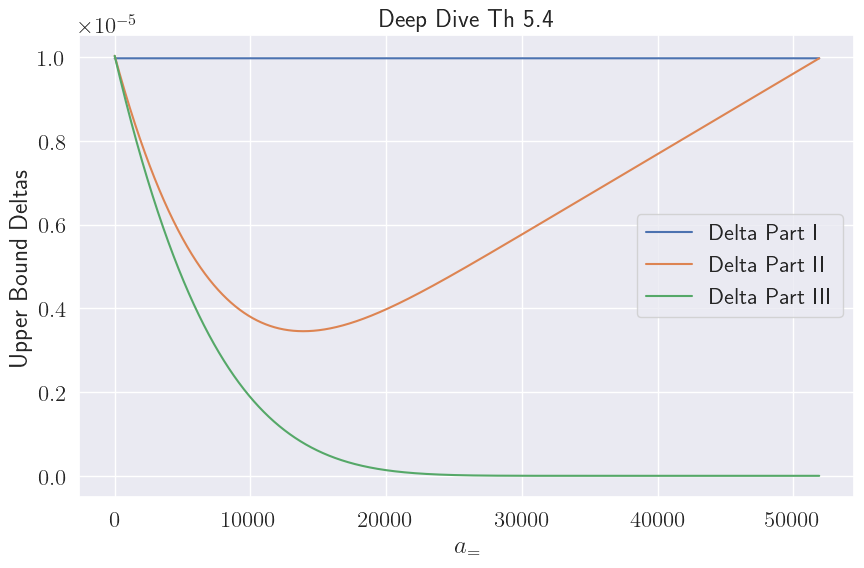

In [30]:
#  c_u 51914, sigma 2228, tau_diff = 16176, epsilon = 0.4
c_u = 51914 # numURLs Contributed
sigma = 2228
tau_diff = 13948
epsilon = 0.349
all_deltas = gshm_delta(c_u, sigma, tau_diff, epsilon)

plt.figure(figsize=(10, 6))
x_values = range(1, c_u + 1)

plt.plot(x_values, all_deltas[0], label=f'Delta Part I')
plt.plot(x_values, all_deltas[1], label=f'Delta Part II')
plt.plot(x_values, all_deltas[2], label=f'Delta Part III')

plt.xlabel('$a_=$')
# plt.yscale("symlog", linthresh=1e-15) 
plt.xscale("linear")
plt.ylabel('Upper Bound Deltas')
plt.title('Deep Dive Th 5.4')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Computing the results as in the paper.
filename = "save/results.npy"
load = True
save = False

c_u = 51914 # numURLs Contributed
sigma = 2228
tau_diff = 13948
epsilon_range = np.arange(0.3,0.4,0.01) # Z values

Y = []
part1, part2, part3, maximum = [], [], [], []

for i in epsilon_range:
    d = gshm_delta(c_u, sigma, tau_diff, i) 
    part1 += [d[0]]
    part2 += [d[1]]
    part3 +=  [d[2]]
    maximum += [d[3]]
    
#x_values = range(1, c_u + 1)
#X, Y = np.meshgrid(x_values, epsilon_range)
#fig = plt.figure(figsize=(20, 20))
#ax = fig.add_subplot(111, projection='3d')

#for part in all_results:
#    ax.plot_surface(X, Y, part, cmap="viridis", alpha=0.7)

#ax2 = fig.add_subplot()
#CS = ax2.contour(X,Y,part1, cmap="Greens", alpha=0.7)
#CS = ax2.contour(X,Y,part2, cmap="Oranges", alpha=0.7)
#CS = ax2.contour(X,Y,part3, cmap="Blues", alpha=0.7)

#plt.xlabel('$a_=$')
# plt.yscale("symlog", linthresh=1e-15)
# plt.xscale("linear")
#plt.ylabel('epsilon range')
#plt.title('Deep Dive Th 5.4')
#plt.legend()
#plt.grid(True)
# plt.ion()

#plt.show()

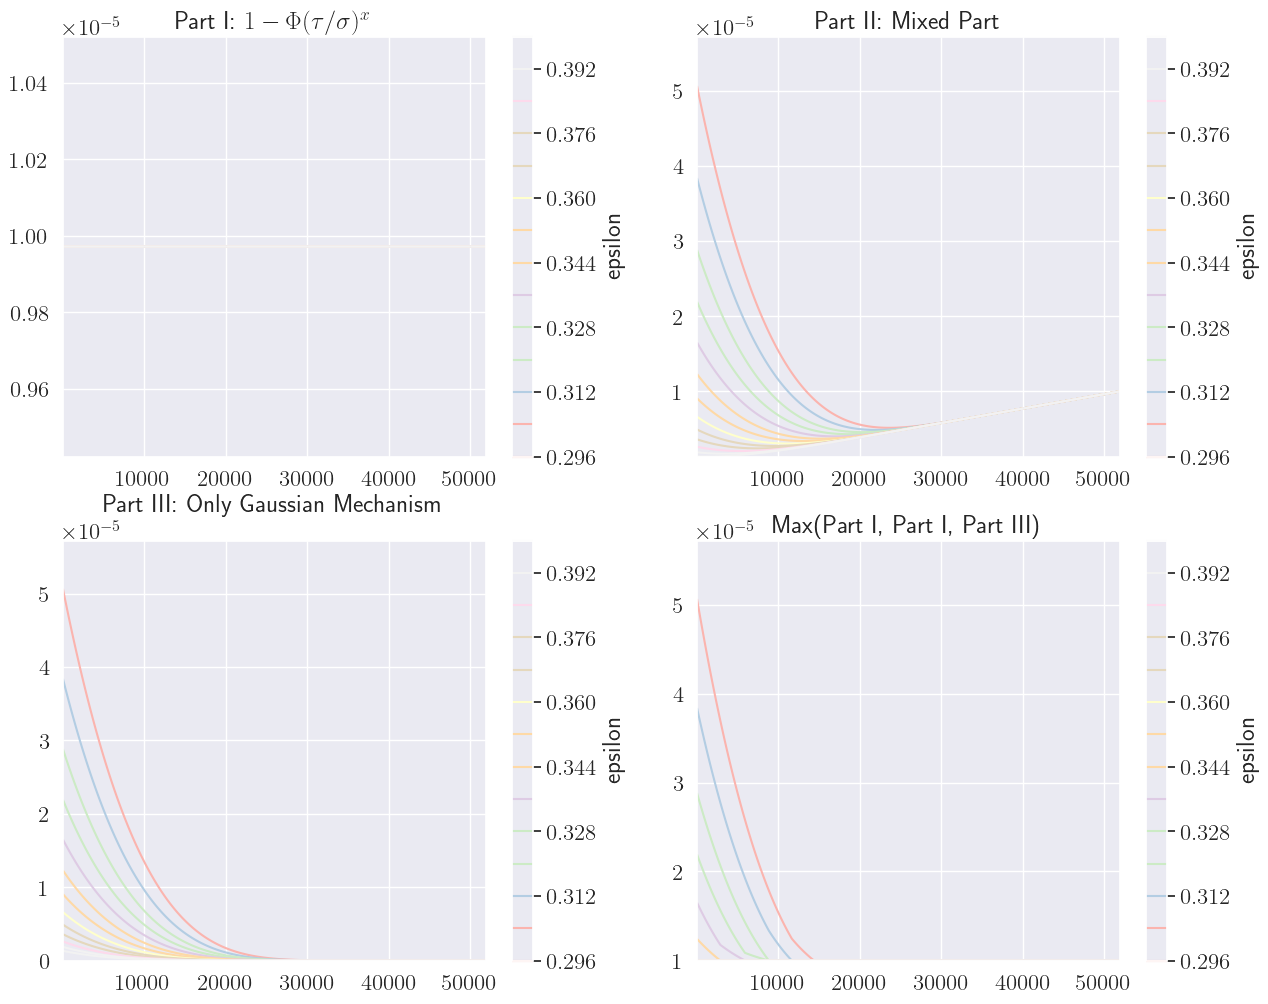

In [28]:
X, Y = np.meshgrid(range(1, c_u + 1), epsilon_range)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,12))

#ax2 = fig.add_subplot()
#CS = ax2.contour(X,all_results_part1,Y, levels=15, cmap="Pastel1")

#ax2 = fig.add_subplot()
CS1 = ax1.contour(X,part1,Y, levels=15, cmap="Pastel1")
ax1.set_title('Part I: $1-\\Phi(\\tau/\\sigma)^x$')
#ax1.set(ylim=(0,3))
plt.colorbar(CS1, label="epsilon")

CS2 = ax2.contour(X,part2,Y, levels=15, cmap="Pastel1")
ax2.set_title('Part II: Mixed Part')
#ax2.set(ylim=(0,3))
plt.colorbar(CS2, label="epsilon")

CS3 = ax3.contour(X,part3,Y, levels=15, cmap="Pastel1")
ax3.set_title('Part III: Only Gaussian Mechanism')
#ax3.set(ylim=(0,3))
plt.colorbar(CS3, label="epsilon")


#ax4.set_ylim(0,3)
CS4 = ax4.contour(X,maximum,Y, levels=15, cmap="Pastel1")
plt.colorbar(CS4, label="epsilon")
ax4.set_title('Max(Part I, Part I, Part III)')
ax4.set_visible(True)

#plt.xlabel('$a_=$')
# plt.yscale("symlog", linthresh=1e-15)
# plt.xscale("linear")
#plt.title('Deep Dive Th 5.4')
# plt.yscale("symlog", linthresh=1e-15)
# plt.xscale("linear")
plt.show()



[np.float64(13349.203920745485), np.float64(13355.878522705858), np.float64(13362.55312466623), np.float64(13369.227726626603), np.float64(13375.902328586975), np.float64(13382.576930547348), np.float64(13389.25153250772), np.float64(13395.926134468096), np.float64(13402.600736428469), np.float64(13409.275338388841), np.float64(13415.949940349214), np.float64(13422.624542309586), np.float64(13429.299144269959), np.float64(13435.973746230331), np.float64(13442.648348190703), np.float64(13449.322950151076), np.float64(13455.997552111448), np.float64(13462.67215407182), np.float64(13469.346756032193), np.float64(13476.02135799257), np.float64(13482.695959952942), np.float64(13489.370561913314), np.float64(13496.045163873687), np.float64(13502.71976583406), np.float64(13509.394367794432), np.float64(13516.068969754804), np.float64(13522.743571715177), np.float64(13529.418173675549), np.float64(13536.092775635921), np.float64(13542.767377596294), np.float64(13549.441979556666), np.float64(1

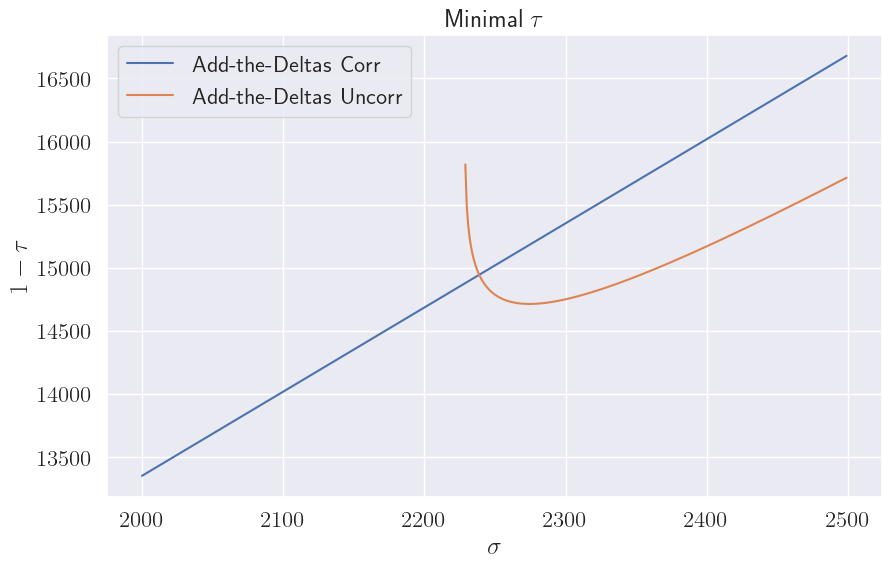

In [5]:
# Reproducing the Plot as in the paper
import src.main.GSHM as gshm

epsilon = 0.349
delta = 10**-5
sigmas = range(2000, 2500)
k = 51914 # C_u in the paper

tau_add_deltas_correlated = [gshm.compute_tau_add_deltas_correlated(delta, epsilon, k, sig) for sig in sigmas]
tau_add_deltas_standard = [gshm.compute_tau_add_deltas_standard(delta, epsilon, k, sig) for sig in sigmas]

plt.figure(figsize=(10, 6))
plt.plot(sigmas, tau_add_deltas_correlated, label='Add-the-Deltas Corr')
plt.plot(sigmas, tau_add_deltas_standard, label='Add-the-Deltas Uncorr')

print(tau_add_deltas_correlated)
print(tau_add_deltas_standard)

plt.xlabel('$\\sigma$')
# plt.yscale("symlog", linthresh=1e-15) 
plt.xscale("linear")

plt.ylabel('$1-\\tau$')
plt.title('Minimal $\\tau$')
plt.legend()
plt.grid(True)

In [ ]:
## 



# Initial Convert due to ChatGPT o4
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def delta_bw(epsilon, mu):
    return norm.cdf(mu / 2 - epsilon / mu) - np.exp(epsilon) * norm.cdf(-mu / 2 - epsilon / mu)

def tau_diff_func(delta, c_u, sigma):
    return norm.ppf((1 - delta) ** (1 / c_u)) * sigma

# Root Finder for mu
def findrootmu(candidate_mu, epsilon, delta):
    mu = candidate_mu
    for _ in range(100):
        f = delta_bw(epsilon, mu) - delta
        fp = (norm.pdf(mu / 2 - epsilon / mu) * (1 / 2 + epsilon / mu**2) - delta
              - np.exp(epsilon) * norm.pdf(-mu / 2 - epsilon / mu) * (-1 / 2 + epsilon / mu**2))
        mu = mu - f / fp
    return mu

# Root Finder for epsilon
def findroot(candidate_epsilon, mu, delta):
    epsilon = candidate_epsilon
    for _ in range(100):
        f = delta_bw(epsilon, mu) - delta
        fp = (norm.pdf(mu / 2 - epsilon / mu) * (-1 / mu)
              - np.exp(epsilon) * norm.cdf(-mu / 2 - epsilon / mu)
              - np.exp(epsilon) * norm.pdf(-mu / 2 - epsilon / mu) * (-1 / mu))
        epsilon = epsilon - f / fp
    return epsilon

# General Result
def gshm_delta(c_u, sigma, tau_diff, epsilon):
    delta_arr = np.zeros(c_u)
    delta_arr2 = np.zeros(c_u)

    for i in range(1, c_u + 1):
        a_eq = i - 1
        mu = np.sqrt(c_u - a_eq) / sigma
        epsilon2 = epsilon - a_eq * np.log(norm.cdf(tau_diff / sigma))
        f = delta_bw(epsilon2, mu)

        delta_arr[i - 1] = 1 - norm.cdf(tau_diff / sigma)**a_eq + norm.cdf(tau_diff / sigma)**a_eq * f
        epsilon3 = epsilon + a_eq * np.log(norm.cdf(tau_diff / sigma))
        delta_arr2[i - 1] = delta_bw(epsilon3, mu)

    final_delta = max(1 - norm.cdf(tau_diff / sigma)**c_u, max(delta_arr), max(delta_arr2))
    return final_delta

# Parameters
c_u = 51914
eps_views = 0.349
delta = 10**(-5)
k = np.sqrt(c_u)
mu_arr = 0
extra_y = 0

# Create sigma, tau curve
mu = findrootmu(np.sqrt(eps_views), eps_views, delta)
min_sigma = k / mu

mu = np.sqrt(mu**2 + np.sum(np.array(mu_arr)**2))
epsilon = findroot(0.01, mu, delta)

# Sigma values
sigma = np.concatenate((np.arange(0.01, 0.1, 0.01), np.arange(0.1, 300, 0.01)))
tau_diff = np.zeros(len(sigma))
tau_diff_gshm = np.zeros(len(sigma))

for i in range(len(sigma)):
    # I guess we want to find the perfect tau to work with.
    mu = k / sigma[i]
    mu = np.sqrt(mu**2 + np.sum(np.array(mu_arr)**2))
    delta_prime = delta_bw(epsilon, mu)
    delta_infinite = delta - delta_prime
    tau_diff[i] = tau_diff_func(delta_infinite, c_u, sigma[i])
    tau_diff_gshm[i] = tau_diff_func(delta, c_u, sigma[i])

# Check tau_diff meets target delta for GSHM
# Not sure where this is used.
tau_diff_gshm_check = []
for i in range(0, len(sigma), 500):
    tau_diff_gshm_check.append(abs(gshm_delta(c_u, sigma[i], tau_diff_gshm[i], epsilon) - delta) < delta**2)
accuracy = sum(tau_diff_gshm_check) / len(tau_diff_gshm_check) # not used.

# Plotting Figure A
min_y = min(np.min(tau_diff), np.min(tau_diff_gshm))
max_y = max(np.max(tau_diff), np.max(tau_diff_gshm))

plt.figure(figsize=(10, 6))
plt.plot(sigma, tau_diff, label="Add deltas", linewidth=2)
plt.plot(sigma[::10], tau_diff_gshm[::10], color="blue", linestyle="--", linewidth=2, label="GSHM")
plt.axvline(x=round(min_sigma), color="gray", linestyle=":", label=f"$\sigma = {round(min_sigma)}$")
plt.ylim(min_y, max_y + extra_y)
plt.xlabel(r"$\sigma$")
plt.ylabel(r"$\tau^* - \tau$")
plt.legend()
plt.grid(True)
plt.show()

# Parameters for epsilon-delta curves
delta_infinite = 10**(-8)
sigma = np.sqrt(c_u) / mu
eps_max = findroot(0.01, mu, delta_infinite)

# Delta-epsilon values for points on curve
delta_plot_vals = 10**np.arange(-8, -4, 1)
eps_plot_vals = [findroot(0.01, mu, dpv) for dpv in delta_plot_vals]

# Delta curves calculation
delta_arr_add_deltas_plot_vals = []
delta_arr_gshm_plot_vals = []
annotations = []

for eps in eps_plot_vals:
    delta_add = delta_bw(eps, mu) + delta_infinite
    tau_diff = tau_diff_func(delta_infinite, c_u, sigma)
    delta_gshm = gshm_delta(c_u, sigma, tau_diff, eps)
    delta_arr_add_deltas_plot_vals.append(delta_add)
    delta_arr_gshm_plot_vals.append(delta_gshm)
    annotations.append(f"$\delta_{{GSHM}}={round(delta_gshm, -int(np.log10(delta_gshm)))}$")